In [6]:
import ScraperFC as sfc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

In [16]:
sofascore = sfc.Sofascore()
match_url = 'https://www.sofascore.com/es/instituto-cordoba-independiente/jobsMYb#11938090'

In [17]:
sofascore.get_team_names(match_url)

('Instituto Córdoba', 'Independiente')

In [139]:
sofascore.get_general_match_stats(match_url).head(3)


,name,home,homeValue,homeTotal,away,awayValue,awayTotal
0,Ball possession,51%,51,NaN,49%,49,NaN
0,Total shots,12,12,NaN,9,9,NaN
1,Shots on target,1,1,NaN,4,4,NaN


In [43]:
df_jugadores_independiente = sofascore.get_players_match_stats(match_url)[1]

In [53]:
df_jugadores_independiente.columns

Index(['name', 'firstName', 'lastName', 'slug', 'shortName', 'position',
       'jerseyNumber', 'userCount', 'id', 'country', 'marketValueCurrency',
       'dateOfBirthTimestamp', 'shirtNumber', 'jerseyNumber', 'position',
       'substitute', 'totalPass', 'accuratePass', 'totalLongBalls',
       'accurateLongBalls', 'aerialWon', 'duelWon', 'totalClearance',
       'wasFouled', 'savedShotsFromInsideTheBox', 'saves', 'punches',
       'minutesPlayed', 'touches', 'rating', 'possessionLostCtrl',
       'ratingVersions', 'goalAssist', 'aerialLost', 'duelLost',
       'challengeLost', 'totalContest', 'totalTackle', 'fouls', 'keyPass',
       'wonContest', 'outfielderBlock', 'interceptionWon', 'dispossessed',
       'totalCross', 'accurateCross', 'shotOffTarget', 'bigChanceMissed',
       'onTargetScoringAttempt', 'blockedScoringAttempt', 'goals',
       'totalOffside', 'bigChanceCreated', 'captain', 'team'],
      dtype='object')

In [140]:
df_jugadores_independiente[['name','touches','possessionLostCtrl','totalPass', 'accuratePass', 'totalLongBalls',
       'accurateLongBalls']].sort_values(by = 'totalPass', ascending = False).head(5)

,name,touches,possessionLostCtrl,totalPass,accuratePass,totalLongBalls,accurateLongBalls
4,Damián Pérez,72.0,21.0,49.0,34.0,16.0,8.0
8,Federico Mancuello,59.0,12.0,47.0,38.0,7.0,4.0
3,Joaquín Laso,50.0,10.0,42.0,33.0,12.0,5.0
1,Mauricio Isla,55.0,15.0,37.0,27.0,8.0,4.0
7,Gabriel Neves,43.0,10.0,30.0,24.0,3.0,2.0


In [42]:
df_jugadores_independiente.loc[df_jugadores_independiente.keyPass >=1][['name','keyPass']].sort_values(by = 'keyPass', ascending = False)

,name,keyPass
8,Federico Mancuello,2.0
10,Gabriel Ávalos,2.0
1,Mauricio Isla,1.0
7,Gabriel Neves,1.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


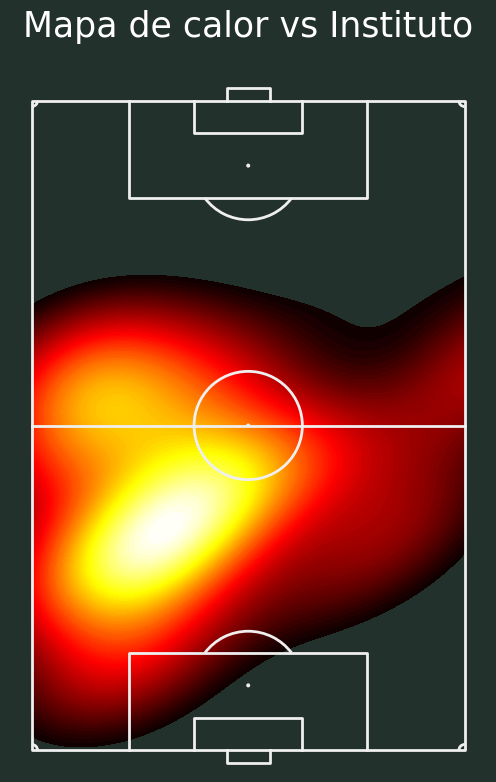

In [67]:
jugador = 'Gabriel Neves'
heat_map_location = sofascore.get_player_heatmap(match_url, player = jugador)

fig, ax = plt.subplots(ncols = 1, figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'statsbomb',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    # pitch_color= 'grass',
    pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True, 
    )
fig.set_facecolor('#22312b')
pitch.draw(ax = ax)

pitch.kdeplot(x = heat_map_location['x'], y = heat_map_location['y'], ax = ax,levels = 100, zorder = -1 ,shade = True, shade_lowest = False, cmap = 'hot')

plt.title('Mapa de calor vs Instituto', color='white', x= 0.5, y = 1.05, fontsize = 25, fontfamily = 'Sans-serif');

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single el

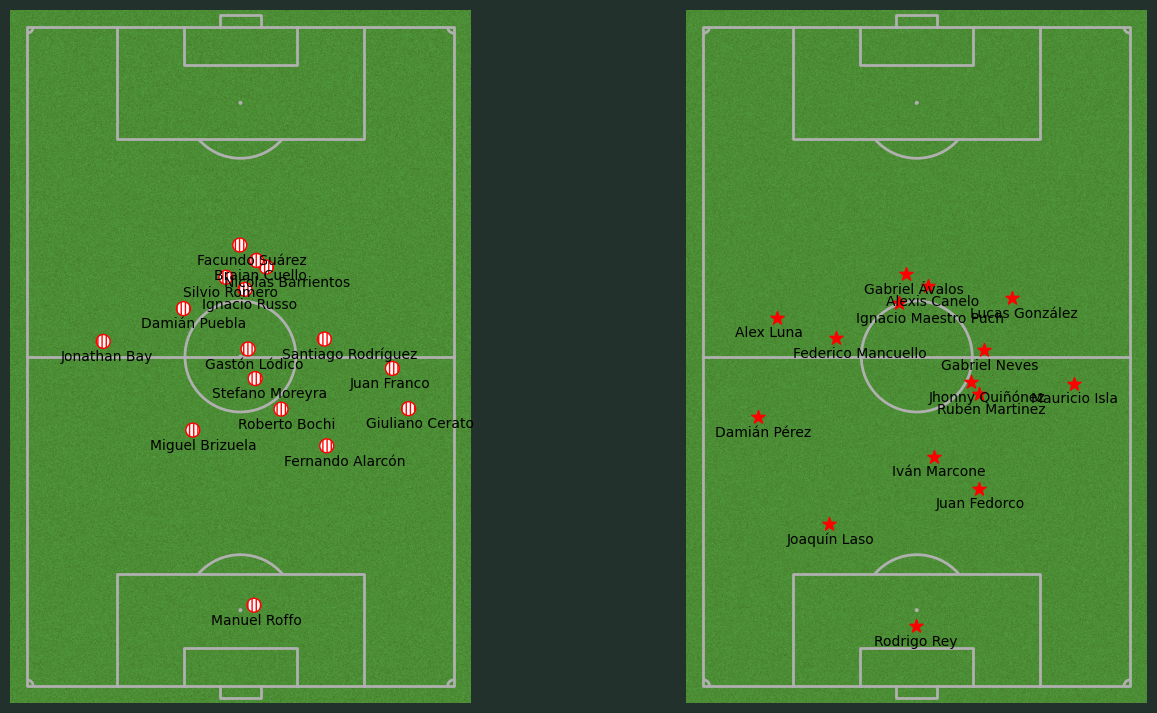

In [178]:
posiciones_promedio_instituto = sofascore.get_players_average_positions(match_url)[0]
posiciones_promedio_independiente = sofascore.get_players_average_positions(match_url)[1]

fig, ax = plt.subplots(ncols = 2, figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'opta',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    pitch_color= 'grass',
    # pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True, 
    )
fig.set_facecolor('#22312b')
pitch.draw(ax = ax[1])
pitch.scatter(posiciones_promedio_independiente.averageX, y = posiciones_promedio_independiente.averageY, marker = '*', ax = ax[1], color = 'red', s = 100)

jugadores = posiciones_promedio_independiente.name
for jugador in jugadores:
    df = posiciones_promedio_independiente.loc[posiciones_promedio_independiente.name == f'{jugador}']
    ax[1].text(x = df.averageY + 10, y = df.averageX - 3, s = f'{jugador}')


pitch.draw(ax = ax[0])
pitch.scatter(posiciones_promedio_instituto.averageX, y = posiciones_promedio_instituto.averageY, marker = 'o', ax = ax[0], s = 100, hatch = '||||',color = 'white', edgecolor = 'red')

jugadores = posiciones_promedio_instituto.name
for jugador in jugadores:
    df = posiciones_promedio_instituto.loc[posiciones_promedio_instituto.name == f'{jugador}']
    ax[0].text(x = df.averageY + 10, y = df.averageX - 3, s = f'{jugador}')


plt.savefig("Posiciones promedio Independiete vs Instituto", dpi = 300)

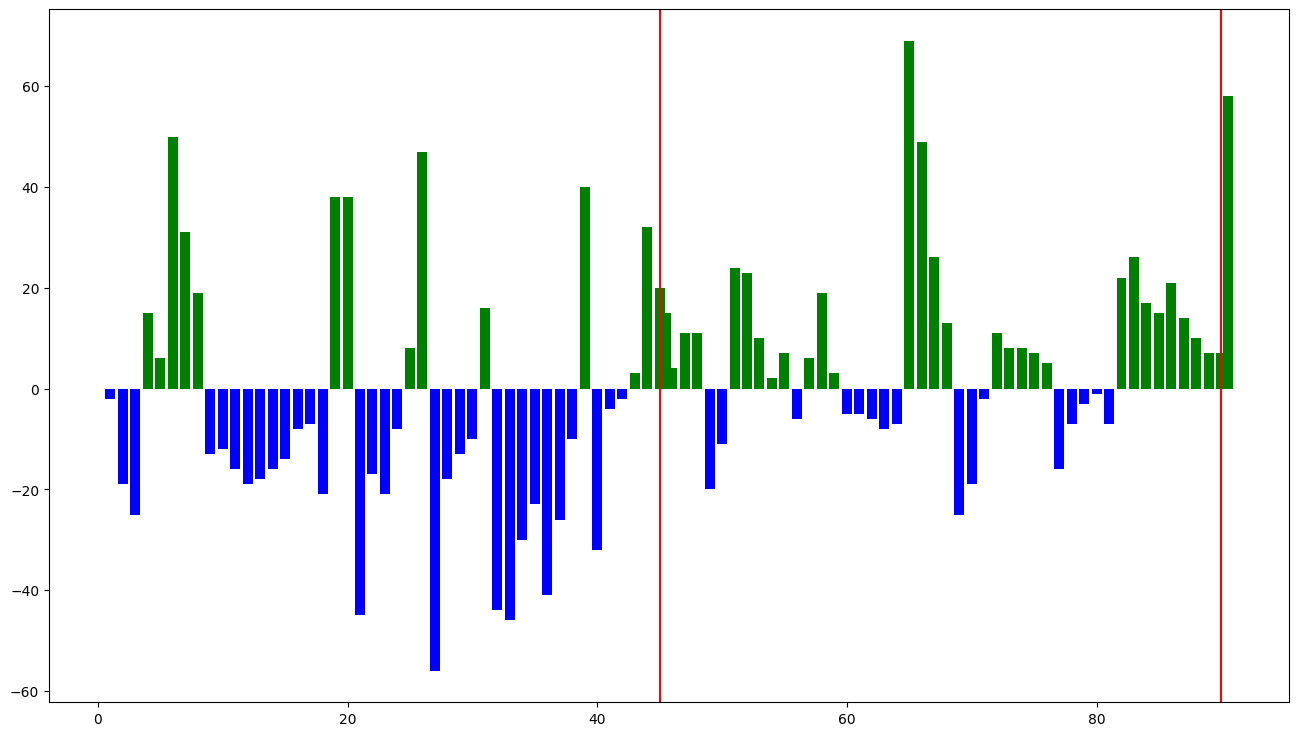

In [137]:
match_momentum = sofascore.match_momentum(match_url)

fig,ax = plt.subplots(figsize = (16,9))
match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visitante = match_momentum[match_momentum['value'] < 0]

plt.bar(match_momentum_local.minute, match_momentum_local.value, color = 'green')
plt.bar(match_momentum_visitante.minute, match_momentum_visitante.value, color = 'blue')

plt.axvline(x = 45, color = 'red')
plt.axvline(x = 90, color = 'red')